In [4]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

%matplotlib inline

2024-11-11 12:20:05.618416: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 12:20:05.621193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 12:20:05.667135: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 12:20:05.668635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Device mapping: no known devices.


2024-11-11 12:20:07.895829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-11 12:20:07.900661: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
!pip install seaborn
import os



In [7]:
pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [8]:
my_data_dir = 'dataset/cell_images'
os.listdir(my_data_dir)





['test', 'train']

In [9]:
test_path = my_data_dir+'/test/'


In [10]:
train_path = my_data_dir+'/train/'

In [11]:
os.listdir(train_path)



['parasitized', 'uninfected']

In [12]:
len(os.listdir(train_path+'/uninfected/'))



12479

In [13]:
len(os.listdir(train_path+'/parasitized/'))


12479

In [14]:
os.listdir(train_path+'/parasitized')[200]

'C189P150ThinF_IMG_20151203_141004_cell_73.png'

In [15]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])


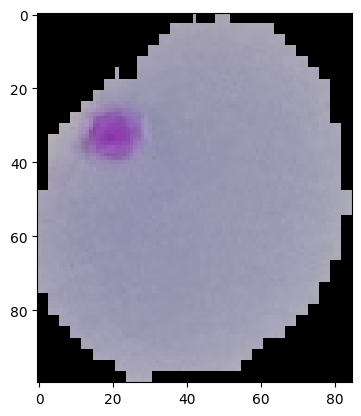

In [16]:
plt.imshow(para_img)

In [17]:
# Checking the image dimensions
dim1 = []
dim2 = []


In [18]:
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


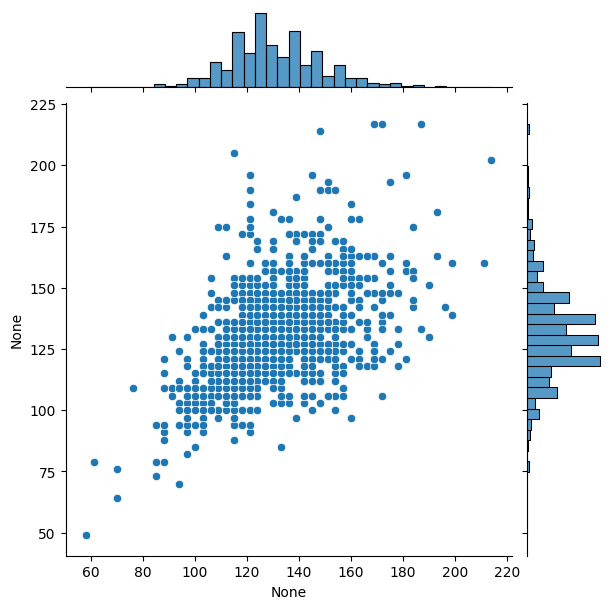

In [19]:
sns.jointplot(x=dim1,y=dim2)


In [20]:
image_shape = (130,130,3)


In [21]:
help(ImageDataGenerator)


Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [23]:
image_gen.flow_from_directory(train_path)




Found 24958 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory(test_path)


Found 2600 images belonging to 2 classes.


In [25]:
image_gen.flow_from_directory(train_path)


Found 24958 images belonging to 2 classes.


In [26]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [27]:
model = models.Sequential()


2024-11-11 12:22:50.557258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-11 12:22:50.557427: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
# Add convolutional layers
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


In [29]:
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


In [30]:
# Flatten the layer
model.add(layers.Flatten())


In [31]:
# Add a dense layer
model.add(layers.Dense(128, activation='relu'))


In [44]:
print("Abinaya S\n212222230002\n")
# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Abinaya S
212222230002

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (No

In [33]:
batch_size = 16
help(image_gen.flow_from_directory)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary')



Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions

In [34]:
train_image_gen.batch_size
len(train_image_gen.classes)
train_image_gen.total_batches_seen


0

In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)


Found 2600 images belonging to 2 classes.


In [36]:
train_image_gen.class_indices

results = model.fit(train_image_gen,epochs=3,
                              validation_data=test_image_gen
                             )


Epoch 1/3


2024-11-11 12:23:17.754637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.7914

2024-11-11 12:25:13.254409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - 125s 80ms/step - loss: 0.4378 - accuracy: 0.7914 - val_loss: 0.2187 - val_accuracy: 0.9312
Epoch 2/3
1560/1560 [==============================] - 123s 79ms/step - loss: 0.2347 - accuracy: 0.9232 - val_loss: 0.2357 - val_accuracy: 0.9292
Epoch 3/3
1560/1560 [==============================] - 124s 79ms/step - loss: 0.2438 - accuracy: 0.9215 - val_loss: 0.2387 - val_accuracy: 0.9235


In [37]:
import pandas as pd

Abinaya S
212222230002



['loss', 'accuracy']

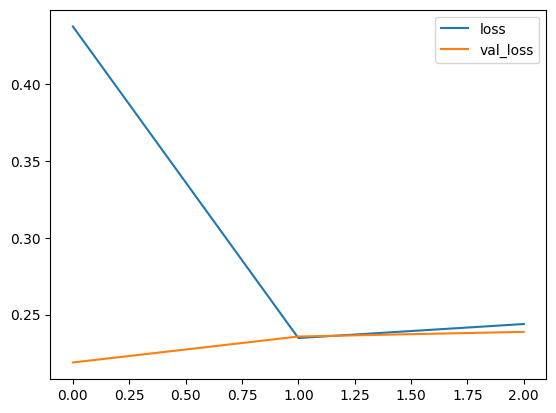

In [38]:
losses = pd.DataFrame(model.history.history)
print("Abinaya S\n212222230002\n")
losses[['loss','val_loss']].plot()

model.metrics_names



In [39]:
print("Abinaya S\n212222230002\n")
model.evaluate(test_image_gen)

pred_probabilities = model.predict(test_image_gen)
print("Abinaya S\n212222230002\n")
test_image_gen.classes

predictions = pred_probabilities > 0.5
print("Abinaya S\n212222230002\n")
print(classification_report(test_image_gen.classes,predictions))

print("Abinaya S\n212222230002\n")
confusion_matrix(test_image_gen.classes,predictions)


Abinaya S
212222230002

  2/163 [..............................] - ETA: 10s - loss: 0.0685 - accuracy: 0.9688

2024-11-11 12:29:39.677424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  1/163 [..............................] - ETA: 29s

2024-11-11 12:29:49.862765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 10s 61ms/step
Abinaya S
212222230002

Abinaya S
212222230002

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1300
           1       0.89      0.96      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600

Abinaya S
212222230002



array([[1138,  162],
       [  49, 1251]])

In [40]:
print("Abinaya S\n212222230002\n")
test_image_gen.classes

Abinaya S
212222230002



array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:

predictions = pred_probabilities > 0.5
print("Abinaya S\n212222230002\n")
print(classification_report(test_image_gen.classes,predictions))


Abinaya S
212222230002

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1300
           1       0.89      0.96      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



In [42]:

print("Abinaya S\n212222230002\n")
confusion_matrix(test_image_gen.classes,predictions)

Abinaya S
212222230002



array([[1138,  162],
       [  49, 1251]])

1/1 [==============================] - 0s 72ms/step
Abinaya S
212222230002



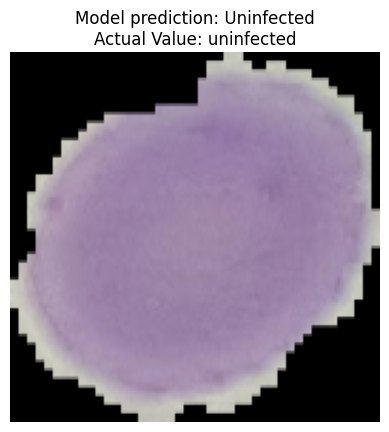

In [43]:
import random
import tensorflow as tf
list_dir=["uninfected"]
dir_=(random.choice(list_dir))
para_img= imread(train_path+
                 '/'+dir_+'/'+
                 os.listdir(train_path+'/'+dir_)[random.randint(0,100)])
img  = tf.convert_to_tensor(np.asarray(para_img))
img = tf.image.resize(img,(130,130))

img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5)

print("Abinaya S\n212222230002\n")
plt.title("Model prediction: "+("Parasitized" if pred  else "Uninfected")+"\nActual Value: "+str(dir_))
plt.axis("off")
plt.imshow(img)
plt.show()